In [1]:
# yfinance Python library
!pip install yfinance

In [2]:
import yfinance as yf
reli= yf.Ticker("RELIANCE.NS")
relc= reli.history(period="60mo")

In [3]:
relc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-07-27 00:00:00+05:30,1091.943831,1109.403241,1084.774727,1102.039062,6742782,0.0,0.0
2018-07-30 00:00:00+05:30,1102.185427,1128.813495,1100.234675,1123.058716,14003964,0.0,0.0
2018-07-31 00:00:00+05:30,1122.668604,1161.098784,1118.913376,1156.807129,14006901,0.0,0.0
2018-08-01 00:00:00+05:30,1161.098901,1173.291164,1156.221900,1163.000854,9796282,0.0,0.0
2018-08-02 00:00:00+05:30,1162.171597,1162.171597,1137.250528,1139.591431,6308209,0.0,0.0
...,...,...,...,...,...,...,...
2023-07-21 00:00:00+05:30,2609.000000,2614.899902,2523.600098,2538.750000,15124619,0.0,0.0
2023-07-24 00:00:00+05:30,2481.000000,2514.949951,2469.300049,2487.399902,11863933,0.0,0.0
2023-07-25 00:00:00+05:30,2494.000000,2505.199951,2480.000000,2485.800049,6013010,0.0,0.0


In [4]:
relc['Close'].describe()

count    1234.000000
mean     1927.042690
std       550.402343
min       867.064575
25%      1327.609253
50%      2059.628418
75%      2422.928284
max      2841.850098
Name: Close, dtype: float64

In [5]:
relc.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [6]:
relc['Close']

Date
2018-07-27 00:00:00+05:30    1102.039062
2018-07-30 00:00:00+05:30    1123.058716
2018-07-31 00:00:00+05:30    1156.807129
2018-08-01 00:00:00+05:30    1163.000854
2018-08-02 00:00:00+05:30    1139.591431
                                ...     
2023-07-21 00:00:00+05:30    2538.750000
2023-07-24 00:00:00+05:30    2487.399902
2023-07-25 00:00:00+05:30    2485.800049
2023-07-26 00:00:00+05:30    2526.199951
2023-07-27 00:00:00+05:30    2502.699951
Name: Close, Length: 1234, dtype: float64

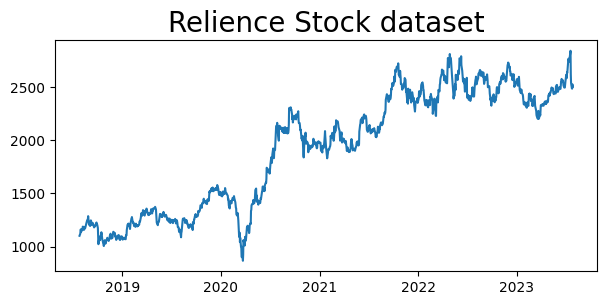

In [7]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 7,3
plt.title('Relience Stock dataset', size=20)
plt.plot(relc["Close"]);

In [8]:
import numpy as np

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scl_rel=scaler.fit_transform(np.array(relc["Close"]).reshape(-1,1))

In [10]:
df=np.array(relc["Close"]).reshape(relc["Close"].shape[0],1)
df.shape

(1234, 1)

In [11]:
scl_rel,scl_rel.shape

(array([[0.11898735],
        [0.12963136],
        [0.14672102],
        ...,
        [0.81970191],
        [0.84015978],
        [0.82825976]]),
 (1234, 1))

In [12]:
train_size=int(np.floor(len(scl_rel)*0.70))

In [13]:
train_data=scl_rel[0:train_size]
test_data=scl_rel[train_size+1:]

In [14]:
train_data.shape,test_data.shape

((863, 1), (370, 1))

In [15]:
def datasets(data,timestep=1):
  X_train,Y_train=[],[]
  for i in range (len(train_data)-timestep-1):
    a=train_data[i:(i+timestep),0]
    X_train.append(a)
    Y_train.append(train_data[i+timestep,0])
  return np.array(X_train),np.array(Y_train)

In [16]:
timestep=90
X_train,Y_train=datasets(train_data,timestep)

In [17]:
import pandas as pd
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.118987,0.129631,0.146721,0.149857,0.138003,0.142251,0.149981,0.145832,0.162378,0.162502,...,0.130249,0.138077,0.137608,0.132126,0.130076,0.131484,0.115925,0.120938,0.099428,0.103034
1,0.129631,0.146721,0.149857,0.138003,0.142251,0.149981,0.145832,0.162378,0.162502,0.155710,...,0.138077,0.137608,0.132126,0.130076,0.131484,0.115925,0.120938,0.099428,0.103034,0.109430
2,0.146721,0.149857,0.138003,0.142251,0.149981,0.145832,0.162378,0.162502,0.155710,0.147561,...,0.137608,0.132126,0.130076,0.131484,0.115925,0.120938,0.099428,0.103034,0.109430,0.107726
3,0.149857,0.138003,0.142251,0.149981,0.145832,0.162378,0.162502,0.155710,0.147561,0.158871,...,0.132126,0.130076,0.131484,0.115925,0.120938,0.099428,0.103034,0.109430,0.107726,0.110270
4,0.138003,0.142251,0.149981,0.145832,0.162378,0.162502,0.155710,0.147561,0.158871,0.154031,...,0.130076,0.131484,0.115925,0.120938,0.099428,0.103034,0.109430,0.107726,0.110270,0.119012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,0.785531,0.758243,0.756678,0.761651,0.786843,0.767835,0.769754,0.774979,0.788004,0.817993,...,0.807745,0.780936,0.790781,0.791791,0.800651,0.833745,0.840914,0.842782,0.849472,0.834099
768,0.758243,0.756678,0.761651,0.786843,0.767835,0.769754,0.774979,0.788004,0.817993,0.814358,...,0.780936,0.790781,0.791791,0.800651,0.833745,0.840914,0.842782,0.849472,0.834099,0.833998
769,0.756678,0.761651,0.786843,0.767835,0.769754,0.774979,0.788004,0.817993,0.814358,0.835436,...,0.790781,0.791791,0.800651,0.833745,0.840914,0.842782,0.849472,0.834099,0.833998,0.811708
770,0.761651,0.786843,0.767835,0.769754,0.774979,0.788004,0.817993,0.814358,0.835436,0.847351,...,0.791791,0.800651,0.833745,0.840914,0.842782,0.849472,0.834099,0.833998,0.811708,0.811910


In [18]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [20]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(90,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 90, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 90, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
def datasets_test(data,timestep=1):
  X_test,Y_test=[],[]
  for i in range (len(test_data)-timestep-1):
    a=test_data[i:(i+timestep),0]
    X_test.append(a)
    Y_test.append(test_data[i+timestep,0])
  return np.array(X_test),np.array(Y_test)

In [23]:
X_test,Y_test=datasets_test(test_data,90)

In [24]:
test_data.shape

(370, 1)

In [25]:
X_test.shape,Y_test.shape

((279, 90), (279,))

In [26]:
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [27]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=90,batch_size=64,verbose=1)

Epoch 1/90
13/13 [==============================] - 19s 463ms/step - loss: 0.0822 - val_loss: 0.0399
Epoch 2/90
13/13 [==============================] - 3s 229ms/step - loss: 0.0136 - val_loss: 0.0029
Epoch 3/90
13/13 [==============================] - 3s 227ms/step - loss: 0.0060 - val_loss: 0.0031
Epoch 4/90
13/13 [==============================] - 2s 184ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 5/90
13/13 [==============================] - 2s 184ms/step - loss: 0.0028 - val_loss: 0.0040
Epoch 6/90
13/13 [==============================] - 2s 182ms/step - loss: 0.0030 - val_loss: 0.0025
Epoch 7/90
13/13 [==============================] - 3s 259ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 8/90
13/13 [==============================] - 3s 205ms/step - loss: 0.0027 - val_loss: 0.0029
Epoch 9/90
13/13 [==============================] - 2s 185ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 10/90
13/13 [==============================] - 2s 186ms/step - loss: 0.0023 - val_loss: 0.002

In [28]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

9/9 [==============================] - 0s 36ms/step


In [29]:
train_pred[:5],Y_train[:5],test_pred[:5],Y_test[:5]

(array([[0.13302131],
        [0.12759157],
        [0.12294701],
        [0.11962819],
        [0.11836109]], dtype=float32),
 array([0.10943003, 0.10772592, 0.11026971, 0.11901213, 0.12222259]),
 array([[0.95887274],
        [0.9455457 ],
        [0.9263055 ],
        [0.90469843],
        [0.8826625 ]], dtype=float32),
 array([0.90533485, 0.8877657 , 0.871711  , 0.85338437, 0.86853027]))

In [30]:
Y_train=Y_train.reshape(Y_train.shape[0],1)
Y_test=Y_test.reshape(Y_test.shape[0],1)

In [31]:
X_train.shape,X_test.shape,Y_train.shape,train_pred.shape,Y_test.shape,test_pred.shape

((772, 90, 1), (279, 90, 1), (772, 1), (772, 1), (279, 1), (279, 1))

In [32]:
train_pred=scaler.inverse_transform(train_pred)
test_pred=scaler.inverse_transform(test_pred)

Y_train=scaler.inverse_transform(Y_train)
Y_test=scaler.inverse_transform(Y_test)

In [33]:
Y_train.shape,train_pred.shape,Y_test.shape,test_pred.shape

((772, 1), (772, 1), (279, 1), (279, 1))

In [34]:
#RMSE
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_pred))

55.663620994470605

In [35]:
math.sqrt(mean_squared_error(Y_test,test_pred))

55.46518259347773

In [36]:
look_back=90
#Shift train predictions for plotting
trainPredPlot=np.empty_like(df)
trainPredPlot[:,:]=np.nan
trainPredPlot[look_back:len(train_pred)+look_back,:]=train_pred

#shift test predictions for plotting
testPredPlot=np.empty_like(df)
testPredPlot[:,:]=np.nan
testPredPlot[len(train_pred)+(look_back*2)+2:len(df)-1, :]=test_pred

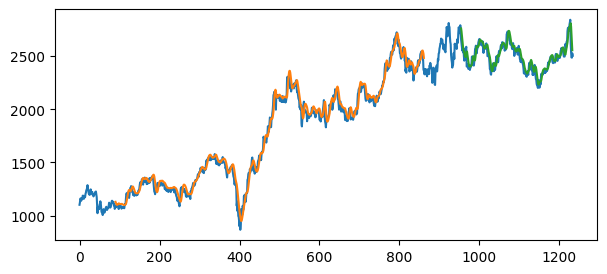

In [37]:
#plot baseline and predictions
plt.plot((df))
plt.plot(trainPredPlot)
plt.plot(testPredPlot)
plt.show()

In [38]:
x_input=test_data[280:].reshape(1,-1)

In [39]:
temp_input=(x_input).tolist()[0]

In [40]:
len(temp_input)

90

In [41]:
len(temp_input[1:])

89

In [42]:
from numpy import array
lst_output =[]
n_steps=90
i=0
while (i<30):
  if (len(temp_input)>90):
    x_input=np.array(temp_input[1:])
    print("{} day input {}". format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1,n_steps,1))
    yhat=model.predict(x_input,verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    lst_output.extend(yhat.tolist())
    i+=1

  else:
    x_input=x_input.reshape((1,n_steps,1))
    yhat=model.predict(x_input,verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i+=1

print(lst_output)

[0.8190058]
91
1 day input [0.68667483 0.67561029 0.71027226 0.71376638 0.6991825  0.6766484
 0.69399206 0.69928375 0.69254882 0.74133897 0.74154148 0.7387058
 0.74660532 0.73819942 0.74402283 0.74923849 0.75372004 0.75977131
 0.74604837 0.7519477  0.74893474 0.75042854 0.754986   0.76412626
 0.75706223 0.76463264 0.78663501 0.79704123 0.7864325  0.80056057
 0.79739567 0.8126631  0.81653701 0.82517089 0.8169168  0.81896768
 0.82144892 0.80349762 0.79615505 0.79349654 0.79749692 0.80410526
 0.80387741 0.79663609 0.79648415 0.83018404 0.83732411 0.83699488
 0.81165033 0.80828293 0.80420651 0.81537231 0.81643576 0.82595568
 0.82671526 0.81775229 0.81886631 0.8374507  0.85314861 0.85350305
 0.86608662 0.85312327 0.85580713 0.85945307 0.84486918 0.83436171
 0.82463916 0.82509486 0.82509486 0.85233835 0.88548116 0.87183413
 0.869682   0.89715334 0.89454551 0.94591815 0.96093239 0.96247689
 0.94994388 0.94877917 0.97713668 0.98916331 1.         0.88758273
 0.84651493 0.82051205 0.81970191 0.8

In [43]:
len(lst_output)

30

In [44]:
day_new=np.arange(1,91)
day_pred=np.arange(91,121)

In [45]:
import matplotlib.pyplot as plt

In [46]:
len(df)

1234

In [47]:
df3=df.tolist()
df3.extend(lst_output)

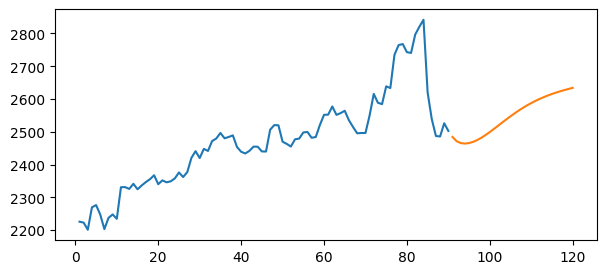

In [48]:
plt.plot(day_new,df[1144:])
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [51]:
#1st pred (epoch =50)
#np.array(scaler.inverse_transform(lst_output)).reshape(1,-1)
# array([[2575.52809143, 2531.22587823, 2493.04781077, 2460.85546634,
#         2433.61914945, 2410.07893089, 2389.09835548, 2369.81028025,
#         2351.63229397, 2334.22446061, 2317.41751836, 2301.15367339,
#         2285.4310424 , 2270.27151878, 2255.69817298, 2241.72536518,
#         2228.35321309, 2215.57112313, 2203.3588498 , 2191.6887321 ,
#         2180.5289893 , 2169.84654591, 2159.60738479, 2149.7778419 ,
#         2140.32601882, 2131.22131188, 2122.43488302, 2113.93907123,
#         2105.70868735, 2097.71971928]])

In [52]:
#2nd pred (epoch = 90)
# np.array(scaler.inverse_transform(lst_output)).reshape(1,-1)
# array([[2484.42534691, 2471.4895324 , 2465.6552975 , 2464.17831772,
#         2465.71344445, 2469.53949065, 2475.18268808, 2482.26366907,
#         2490.44367461, 2499.41184214, 2508.88967833, 2518.63082372,
#         2528.42446616, 2538.09557625, 2547.50490732, 2556.54334556,
#         2565.13332246, 2573.22351803, 2580.78474108, 2587.80886988,
#         2594.30249598, 2600.28586488, 2605.78734383, 2610.8435395 ,
#         2615.493295  , 2619.77886694, 2623.74098172, 2627.42083658,
#         2630.85597985, 2634.08101722]])